<a href="https://colab.research.google.com/github/The237/DeepLearningCourses/blob/main/01_05_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [103]:
# define a loss function based on mean squared
def erreur(X, Y, W, B):
  M = np.dot(X,W)

  P = M+B

  L = np.mean((Y-P)**2)

  return L

In [104]:
# define a loss function based on mean squared
def erreur(X, Y, params):
  info = {}
  M = np.dot(X,params["W"])

  P = M+params["B"]

  L = np.mean((Y-P)**2)

  info["M"] = M
  info["P"] = P
  info["X"] = X
  info["Y"] = Y

  return L, info

In [105]:
def gradient(info, params):
  grads = {}

  dL_dP = -2*(info["Y"] - info["P"]) # shape (4,1)

  dP_dM = 1

  dM_dW = info["X"].T # shape (3,4)

  dL_dW = np.dot(dM_dW,dL_dP) * dP_dM

  grads["W"] = dL_dW

  dP_dB = 1
  dL_dB = dL_dP * dP_dB # shape (4,1) *1

  grads["B"] = np.sum(dL_dB)

  return grads

In [44]:
X = np.array([
    [2,3,-2],
    [4,5,-1],
    [-5,2,3],
    [0,5,4]
])

In [5]:
X.shape

(4, 3)

In [35]:
Y = np.array([
    [2],
    [5],
    [6],
    [3]
])

In [7]:
Y.shape

(4, 1)

In [85]:
W = np.array([
    [0.02],
    [18],
    [15]
])

B = .5

In [86]:
params = {"W":W,"B":B}

In [49]:
loss, info = erreur(X,Y, params)

In [50]:
loss

8232.7495

In [51]:
info

{'M': array([[ 24.04],
        [ 75.08],
        [ 80.9 ],
        [150.  ]]),
 'P': array([[ 24.54],
        [ 75.58],
        [ 81.4 ],
        [150.5 ]]),
 'X': array([[ 2,  3, -2],
        [ 4,  5, -1],
        [-5,  2,  3],
        [ 0,  5,  4]]),
 'Y': array([[2],
        [5],
        [6],
        [3]])}

In [53]:
grads = gradient(info, params)

In [54]:
grads

{'W': array([[ -99.2 ],
        [2617.64],
        [1401.08]]),
 'B': 632.04}

In [40]:
params

{'W': array([[ 0.02],
        [18.  ],
        [15.  ]]),
 'B': 0.5}

In [55]:
lr = .01
params["W"] = params["W"] - lr*grads["W"]
params["B"] = params["B"] - lr*grads["B"]

In [56]:
params

{'W': array([[ 1.012 ],
        [-8.1764],
        [ 0.9892]]),
 'B': -5.820399999999999}

In [57]:
new_loss, info = erreur(X,Y, params)

In [58]:
new_loss

1604.6036749200002

In [61]:
for p in params:
  params[p] -= lr*grads[p]

In [62]:
params

{'W': array([[  2.004 ],
        [-34.3528],
        [-13.0216]]),
 'B': -12.140799999999999}

In [63]:
new_loss1, info = erreur(X,Y, params)

In [64]:
new_loss1

27842.063887680008

In [76]:
def train(X, Y, params, epoch, lr):
  errors = []
  for i in range(epoch):

    # forward
    loss , info = erreur(X,Y, params)
    errors.append(loss)
    print(f'Epoch {i+1} ............. loss : {loss}')

    # backward
    grads = gradient(info, params)

    # update
    for p in params:
      params[p] -= lr*grads[p]

  return params, errors

In [77]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [78]:
Y

array([[2],
       [5],
       [6],
       [3]])

In [87]:
params

{'W': array([[ 0.02],
        [18.  ],
        [15.  ]]),
 'B': 0.5}

In [88]:
params, errors = train(X, Y, params, epoch = 100, lr = .01)

Epoch 1 ............. loss : 8232.7495
Epoch 2 ............. loss : 1604.6036749200002
Epoch 3 ............. loss : 418.642019512208
Epoch 4 ............. loss : 132.7375541654032
Epoch 5 ............. loss : 55.10595322352058
Epoch 6 ............. loss : 30.87104990900073
Epoch 7 ............. loss : 21.208720843180906
Epoch 8 ............. loss : 16.026355056999368
Epoch 9 ............. loss : 12.579903243269353
Epoch 10 ............. loss : 10.039007517112244
Epoch 11 ............. loss : 8.090796284512894
Epoch 12 ............. loss : 6.576656396391344
Epoch 13 ............. loss : 5.394541473181758
Epoch 14 ............. loss : 4.470254671236603
Epoch 15 ............. loss : 3.7471898061751676
Epoch 16 ............. loss : 3.181428987755241
Epoch 17 ............. loss : 2.738706468765698
Epoch 18 ............. loss : 2.392237767367112
Epoch 19 ............. loss : 2.121073561215284
Epoch 20 ............. loss : 1.9088252064721272
Epoch 21 ............. loss : 1.7426710421565281
Ep

In [80]:
import matplotlib.pyplot as plt

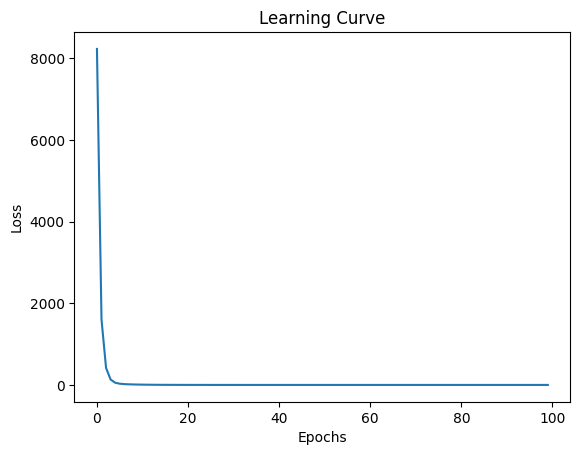

In [91]:
plt.plot(list(range(len(errors))), errors)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()

In [99]:
def predict(X, params):
  M = np.dot(X, params["W"])

  P = M + params["B"]

  return P

In [100]:
prediction = predict(X, params)

In [101]:
prediction

array([[3.33425725],
       [3.65639134],
       [5.45212   ],
       [3.74985913]])

In [102]:
Y

array([[2],
       [5],
       [6],
       [3]])